In [2]:
import pandas as pd

#Lectura del archivo con pandas
df_infractores=pd.read_csv('C:/Users/ADMI/Desktop/RegistroInfractores/data/raw/INFRACTORESRECURSOSHUMANOS.csv')

print(df_infractores.head())

  Numero                              Infractor DocumentoIdentidad  \
0      1             ABANO VEINTEMILLA JONATHAN           04963135   
1      2        ABANO VEINTEMILLAS ANGEL DANIEL           05061884   
2      3      ABANTO HUACCHA ELEUTERIO OLEGARIO           00067690   
3      4         ABANTO VARGAS MARIA DEL CARMEN           27906159   
4      5  ABENSUR REATEGUI LUZ PATRICIA MARTINA           47478469   

                                      tituloHab  \
0  GOREMAD-GRRNYGA-DRFFS/DFFS-TAH/P-MAD-D-26-14   
1                                           NaN   
2                                           NaN   
3                             06-CAJ/A-A-119-08   
4                                           NaN   

                                       Resolucion FechaResolucion  \
0                  RD N° 475-2016-OSINFOR-DSPAFFS      13/09/2016   
1  RDR N° 408-2015-GOREMAD-GRRNYGA-DRFFS-DFFS-TAH      31/08/2015   
2          RDE N° 497-2014-GRU-P-GGR-GRDE-DEFFS-U      04/12/2014

<h3>Se ah cargado el archivo correctamente a una variable df que luego sera ultilizada para su analisi</h3>

<h1> Revisión Inicial del Conjunto de Datos</h1>

In [5]:
import pandas as pd

print(df_infractores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Numero              4361 non-null   object
 1   Infractor           4343 non-null   object
 2   DocumentoIdentidad  4338 non-null   object
 3   tituloHab           1399 non-null   object
 4   Resolucion          4343 non-null   object
 5   FechaResolucion     4271 non-null   object
 6   OrganoSancionador   4343 non-null   object
 7   AmbitoInfraccion    4130 non-null   object
dtypes: object(8)
memory usage: 272.7+ KB
None


<p>El Dataframe cuenta con 8 columnas de las cuales todas son de tipo object es decir String </p>

In [7]:
import pandas as pd

print(df_infractores.describe().transpose())

                   count unique  \
Numero              4361   4361   
Infractor           4343   3860   
DocumentoIdentidad  4338   3825   
tituloHab           1399   1311   
Resolucion          4343   4053   
FechaResolucion     4271   1360   
OrganoSancionador   4343      5   
AmbitoInfraccion    4130     72   

                                                                  top  freq  
Numero                                                              1     1  
Infractor                                      PIZARRO ATAUSUPA MARIO    29  
DocumentoIdentidad                                           04802860    29  
tituloHab                                       17-TAM/C-FYR-A-026-04     4  
Resolucion          RA N° D000206-2020-MINAGRI-SERFOR-ATFFS-SELVA ...    13  
FechaResolucion                                            02/10/2017    21  
OrganoSancionador                                              SERFOR  1959  
AmbitoInfraccion                                   GORE Madr

In [8]:
# Validar si hay duplicados en la columna "Numero"
if df_infractores['Numero'].is_unique:
    print("La columna 'Numero' no tiene valores duplicados. ")
else:
    print(f"Hay {df_infractores['Numero'].duplicated().sum()} duplicados en la columna 'Numero' ")

La columna 'Numero' no tiene valores duplicados. 


<h3>Con este script validamos que Cada registro tien un número único, ya que el valor más frecuente aparece solo una vez, lo que indica que no hay duplicados en esta columna</h3>

<h2>Infractores únicos y más frecuentes</h2>

In [9]:
# Cantidad de infractores únicos
infractores_unicos = df_infractores['Infractor'].nunique()
print(f"Hay {infractores_unicos} infractores únicos.")

# Infractor más frecuente
infractor_frecuente = df_infractores['Infractor'].mode()[0]
frecuencia_infractor = df_infractores['Infractor'].value_counts().iloc[0]
print(f"El infractor más frecuente es {infractor_frecuente}, con {frecuencia_infractor} apariciones.")


Hay 3860 infractores únicos.
El infractor más frecuente es PIZARRO ATAUSUPA MARIO, con 29 apariciones.


<h2>Documentos asociados a múltiples infracciones</h2>

In [10]:
# Cantidad de documentos únicos
documentos_unicos = df_infractores['DocumentoIdentidad'].nunique()
print(f"Hay {documentos_unicos} documentos de identidad únicos.")

# Documento más frecuente
documento_frecuente = df_infractores['DocumentoIdentidad'].mode()[0]
frecuencia_documento = df_infractores['DocumentoIdentidad'].value_counts().iloc[0]
print(f"El documento más frecuente es {documento_frecuente}, con {frecuencia_documento} apariciones.")


Hay 3825 documentos de identidad únicos.
El documento más frecuente es 04802860, con 29 apariciones.


<h2>Registros con títulos habilitantes</h2>

In [11]:
# Cantidad de registros con títulos habilitantes
titulo_hab_valido = df_infractores['tituloHab'].notna().sum()
titulo_hab_unicos = df_infractores['tituloHab'].nunique()
print(f"Hay {titulo_hab_valido} registros con 'tituloHab', de los cuales {titulo_hab_unicos} son únicos.")

# Título habilitante más frecuente
titulo_frecuente = df_infractores['tituloHab'].mode()[0]
frecuencia_titulo = df_infractores['tituloHab'].value_counts().iloc[0]
print(f"El título habilitante más frecuente es {titulo_frecuente}, con {frecuencia_titulo} apariciones.")


Hay 1399 registros con 'tituloHab', de los cuales 1311 son únicos.
El título habilitante más frecuente es 17-TAH/C-OPB-A-053-08, con 4 apariciones.


<h2>Resoluciones recurrentes</h2>

In [12]:
# Cantidad de resoluciones únicas
resoluciones_unicas = df_infractores['Resolucion'].nunique()
print(f"Hay {resoluciones_unicas} resoluciones únicas.")

# Resolución más frecuente
resolucion_frecuente = df_infractores['Resolucion'].mode()[0]
frecuencia_resolucion = df_infractores['Resolucion'].value_counts().iloc[0]
print(f"La resolución más frecuente es {resolucion_frecuente}, con {frecuencia_resolucion} apariciones.")


Hay 4053 resoluciones únicas.
La resolución más frecuente es RA N° D000206-2020-MINAGRI-SERFOR-ATFFS-SELVA CENTRAL, con 13 apariciones.


<h2>Fechas de sanción más comunes</h2>

In [13]:
# Cantidad de fechas únicas
fechas_unicas = df_infractores['FechaResolucion'].nunique()
print(f"Hay {fechas_unicas} fechas de resolución únicas.")

# Fecha más frecuente
fecha_frecuente = df_infractores['FechaResolucion'].mode()[0]
frecuencia_fecha = df_infractores['FechaResolucion'].value_counts().iloc[0]
print(f"La fecha de resolución más común es {fecha_frecuente}, con {frecuencia_fecha} apariciones.")


Hay 1360 fechas de resolución únicas.
La fecha de resolución más común es 02/10/2017, con 21 apariciones.


<h2>Organos sancionadores</h2>

In [14]:
# Cantidad de órganos sancionadores únicos
organos_unicos = df_infractores['OrganoSancionador'].nunique()
print(f"Hay {organos_unicos} órganos sancionadores únicos.")

# Órgano sancionador más frecuente
organo_frecuente = df_infractores['OrganoSancionador'].mode()[0]
frecuencia_organo = df_infractores['OrganoSancionador'].value_counts().iloc[0]
print(f"El órgano sancionador más frecuente es {organo_frecuente}, con {frecuencia_organo} sanciones.")


Hay 5 órganos sancionadores únicos.
El órgano sancionador más frecuente es SERFOR, con 1959 sanciones.


<h2>Areas geográficas de infracción</h2>

In [15]:
# Cantidad de ámbitos de infracción únicos
ambitos_unicos = df_infractores['AmbitoInfraccion'].nunique()
print(f"Hay {ambitos_unicos} ámbitos de infracción únicos.")

# Ámbito de infracción más frecuente
ambito_frecuente = df_infractores['AmbitoInfraccion'].mode()[0]
frecuencia_ambito = df_infractores['AmbitoInfraccion'].value_counts().iloc[0]
print(f"El ámbito de infracción más frecuente es {ambito_frecuente}, con {frecuencia_ambito} apariciones.")


Hay 72 ámbitos de infracción únicos.
El ámbito de infracción más frecuente es GORE Madre de Dios, con 342 apariciones.


<h1>Manejo de Datos Faltantes</h1>

In [16]:
print(df_infractores.isnull().sum())   # Contar valores nulos en cada columna


Numero                   0
Infractor               18
DocumentoIdentidad      23
tituloHab             2962
Resolucion              18
FechaResolucion         90
OrganoSancionador       18
AmbitoInfraccion       231
dtype: int64


In [3]:
# Eliminar la columna 'tituloHab' del DataFrame
df_infractores.drop(columns=['tituloHab'], inplace=True)

# Verificar que se ha eliminado
print(df_infractores.columns)


Index(['Numero', 'Infractor', 'DocumentoIdentidad', 'Resolucion',
       'FechaResolucion', 'OrganoSancionador', 'AmbitoInfraccion'],
      dtype='object')


<h1>Manejo de Valores Atípicos</h1>

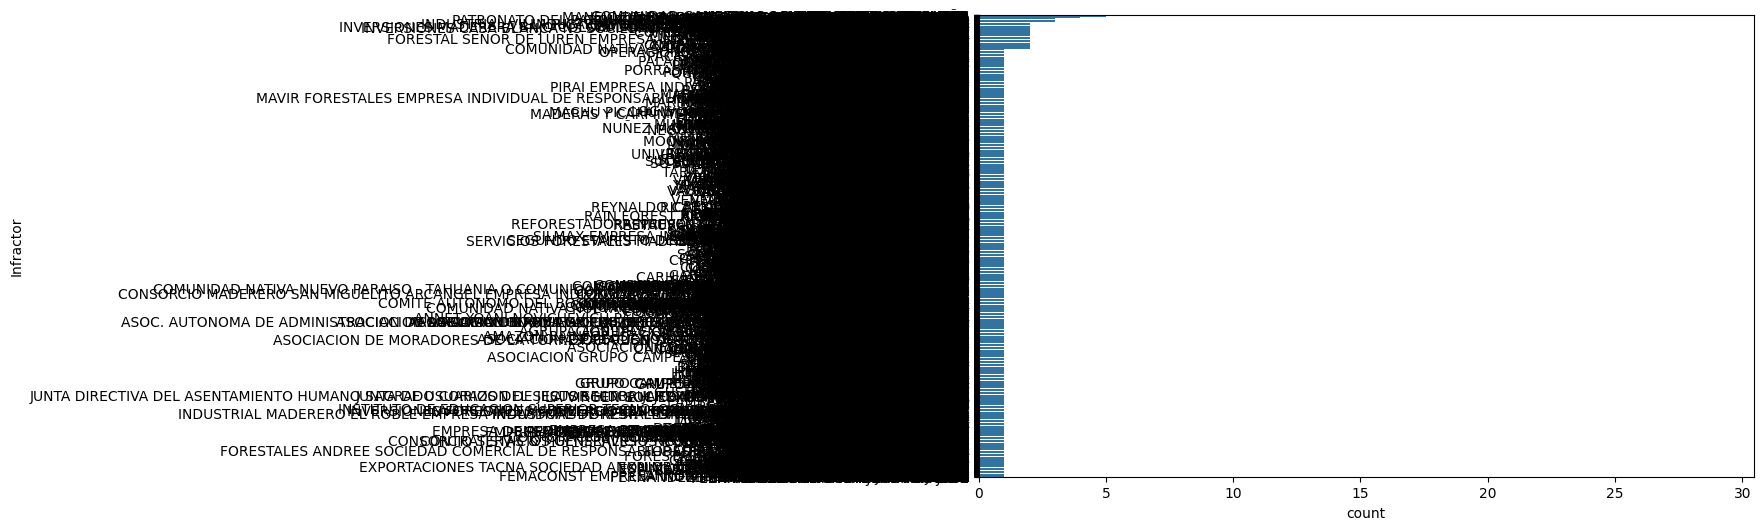

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para visualizar la cantidad de sanciones por órgano sancionador

plt.figure(figsize=(10, 6))
sns.countplot(x=df_infractores['OrganoSancionador'])
plt.title('Frecuencia de Sanciones por Organo Sancionador')
plt.xticks(rotation=45)
plt.show()


